In [92]:
import os 
import sklearn
import numpy as np 
import datetime as dt
import matplotlib.pyplot as plt 
import pandas as pd
import scipy as sc
from keras.layers import Dense, Activation, Dropout, LSTM, InputLayer
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [151]:
class LSTM_model :
    def __init__(self, input_shape, output_shape):
        self.input_shape = input_shape
        self.output_shape = output_shape
        self.model= self.build_model()
    
    def build_model(self):
        model = Sequential()
        model.add(LSTM(units = 128, input_shape = self.input_shape, return_sequences=True))
        model.add(LSTM(units= 64,activation='relu'))
        model.add(Dense(units=self.output_shape, activation='linear'))
        model.compile(loss='mean_squared_error', optimizer='adam')
        return model
    def train(self, X_train, y_train, X_val, y_val, epochs , batch_size):
        save_fname = os.path.join('/home/alex/Documents/', '%s-e%s.h5' % (dt.datetime.now().strftime('%d%m%Y-%H%M%S'), str(epochs)))
        callbacks = [EarlyStopping(monitor='val_loss', patience=100),
                     ModelCheckpoint(filepath=save_fname, monitor='val_loss',save_best_only=True)]
        X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
        history = self.model.fit(X_train_reshaped, y_train, validation_data=(X_val,y_val), epochs= epochs, batch_size=batch_size,callbacks=callbacks)
        self.model.save(save_fname)
        return history
    def predict(self, X_test):
        X_test_reshaped = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
        y_pred = self.model.predict(X_test_reshaped)
        return y_pred
        

In [138]:

# Generate a random dataset of shape (600, 13)
data = np.random.randn(800, 13)
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)
data_norm = (data - mean) / std
data.shape
X = data[:,:5]
y = data[:,5]
print(X.shape)


(800, 5)


In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
#X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
#X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)


In [152]:
input_shape = (X_train.shape[1], 1)
output_shape = y_train.shape[0]
model = LSTM_model(input_shape, output_shape)
history = model.train(X_train, y_train, X_test, y_test, epochs=200, batch_size=32)
y_pred = model.predict(X_test)

Epoch 1/200


2023-05-05 17:45:51.857277: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-05 17:45:51.859078: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-05 17:45:51.860136: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

 8/13 [=================>............] - ETA: 0s - loss: 0.9330 

2023-05-05 17:45:54.318816: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-05 17:45:54.321380: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-05 17:45:54.322772: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

13/13 [==============================] - 3s 42ms/step - loss: 0.9638 - val_loss: 1.0805
Epoch 2/200
13/13 [==============================] - 0s 12ms/step - loss: 0.9633 - val_loss: 1.0810
Epoch 3/200
13/13 [==============================] - 0s 11ms/step - loss: 0.9632 - val_loss: 1.0812
Epoch 4/200
13/13 [==============================] - 0s 11ms/step - loss: 0.9631 - val_loss: 1.0813
Epoch 5/200
13/13 [==============================] - 0s 12ms/step - loss: 0.9631 - val_loss: 1.0815
Epoch 6/200
13/13 [==============================] - 0s 12ms/step - loss: 0.9631 - val_loss: 1.0817
Epoch 7/200
13/13 [==============================] - 0s 12ms/step - loss: 0.9632 - val_loss: 1.0821
Epoch 8/200
13/13 [==============================] - 0s 11ms/step - loss: 0.9631 - val_loss: 1.0819
Epoch 9/200
13/13 [==============================] - 0s 11ms/step - loss: 0.9630 - val_loss: 1.0819
Epoch 10/200
13/13 [==============================] - 0s 11ms/step - loss: 0.9630 - val_loss: 1.0819
Epoch 11/20

2023-05-05 17:46:16.148692: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-05 17:46:16.149951: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-05 17:46:16.151486: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

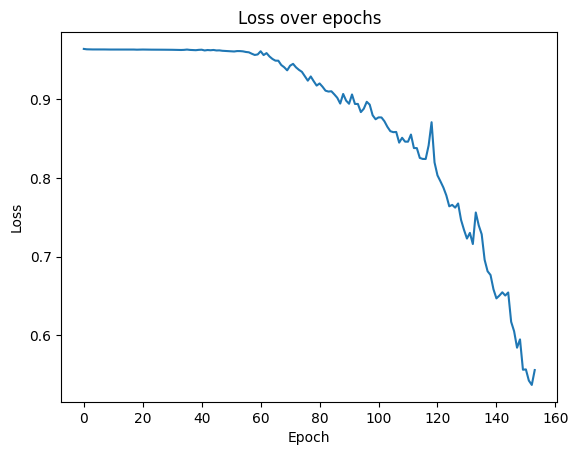

In [153]:
plt.plot(history.history['loss'])
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

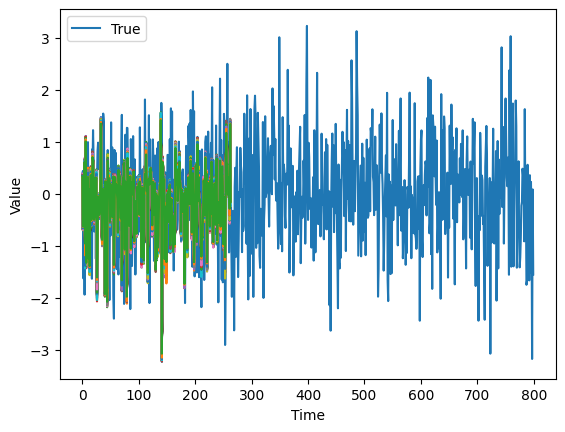

In [154]:
plt.plot(y, label='True')

# Plot the predicted data
plt.plot(y_pred)

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()